In [558]:
import numpy as np

import pandas as pd

from matplotlib import pyplot as plt

import seaborn as sns

In [559]:
from sklearn.preprocessing import LabelEncoder

In [560]:
from sklearn.model_selection import train_test_split 

In [561]:
from scipy.stats import zscore

In [562]:
df = pd.read_csv('Qualitative_Bankruptcy.data.txt', names = ['Industrial_Risk','Management_Risk','Financial_Flexibility','Credibility','Competitiveness','Operating Risk','Class'])

# Q1  Understanding the features and target variable

In [563]:
df.head(10)

,Industrial_Risk,Management_Risk,Financial_Flexibility,Credibility,Competitiveness,Operating Risk,Class
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB
5,A,A,P,P,P,A,NB
6,P,P,A,P,P,P,NB
7,P,P,P,A,A,P,NB
8,P,P,A,P,A,P,NB
9,P,P,A,A,P,P,NB


In [564]:
df.shape

(250, 7)

In [565]:
df.isna().sum()

Industrial_Risk          0
Management_Risk          0
Financial_Flexibility    0
Credibility              0
Competitiveness          0
Operating Risk           0
Class                    0
dtype: int64

In [566]:
df.isnull().sum()

Industrial_Risk          0
Management_Risk          0
Financial_Flexibility    0
Credibility              0
Competitiveness          0
Operating Risk           0
Class                    0
dtype: int64

In [567]:
df.dtypes

Industrial_Risk          object
Management_Risk          object
Financial_Flexibility    object
Credibility              object
Competitiveness          object
Operating Risk           object
Class                    object
dtype: object

In [568]:
#Where class is the target(Dependent) variable 

In [569]:
df.describe()

,Industrial_Risk,Management_Risk,Financial_Flexibility,Credibility,Competitiveness,Operating Risk,Class
count,250,250,250,250,250,250,250
unique,3,3,3,3,3,3,2
top,N,N,N,N,N,N,NB
freq,89,119,119,94,103,114,143


In [570]:
for col in df:
    print (col)
    print (df[col].unique())

Industrial_Risk
['P' 'N' 'A']
Management_Risk
['P' 'N' 'A']
Financial_Flexibility
['A' 'P' 'N']
Credibility
['A' 'P' 'N']
Competitiveness
['A' 'P' 'N']
Operating Risk
['P' 'N' 'A']
Class
['NB' 'B']


In [571]:
var = ['Industrial_Risk','Management_Risk','Financial_Flexibility','Credibility','Competitiveness','Operating Risk','Class']
var

['Industrial_Risk',
 'Management_Risk',
 'Financial_Flexibility',
 'Credibility',
 'Competitiveness',
 'Operating Risk',
 'Class']

# Encode independent features

In [572]:
def func_labelEncoder(var,features):
    encode= LabelEncoder()
    features[var] = encode.fit_transform(features[var].astype(str))
    
for i in var:
    func_labelEncoder(i,df)

In [573]:
df.head()

,Industrial_Risk,Management_Risk,Financial_Flexibility,Credibility,Competitiveness,Operating Risk,Class
0,2,2,0,0,0,2,1
1,1,1,0,0,0,1,1
2,0,0,0,0,0,0,1
3,2,2,2,2,2,2,1
4,1,1,2,2,2,1,1


In [574]:
df.describe()

,Industrial_Risk,Management_Risk,Financial_Flexibility,Credibility,Competitiveness,Operating Risk,Class
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.996000,0.972000,0.932000,1.008000,1.140000,1.088000,0.572000
std,0.804096,0.724788,0.722123,0.791481,0.755435,0.733764,0.495781
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000


In [575]:
# Industrial risk, Management Risk, Financial Flexibility, Class are sightly Right skewed and almost uniformly distributed
# Credibility, Competitiveness , Operating Risk are slight left skewed and almost uniformly distributed

C:\Users\harin\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\harin\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\harin\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\harin\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\harin\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


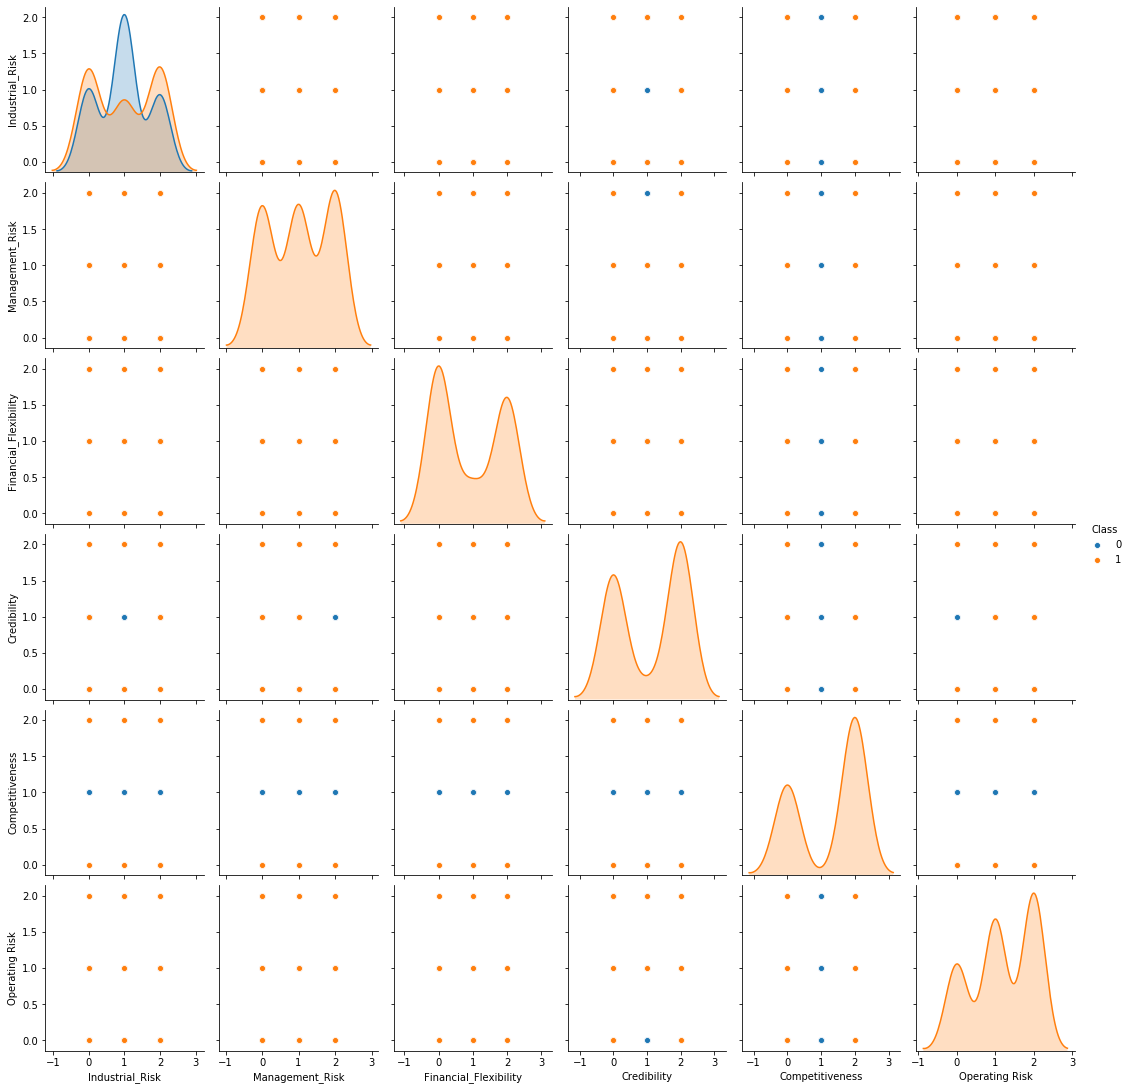

In [576]:
sns.pairplot(df, diag_kind='kde', hue = 'Class')

In [577]:
df.corr()

,Industrial_Risk,Management_Risk,Financial_Flexibility,Credibility,Competitiveness,Operating Risk,Class
Industrial_Risk,1.000000,0.110063,0.068694,-0.050432,0.060428,0.177573,0.015836
Management_Risk,0.110063,1.000000,-0.018999,-0.006609,-0.132174,0.253851,0.100632
Financial_Flexibility,0.068694,-0.018999,1.000000,-0.020124,0.150036,-0.064455,-0.047966
Credibility,-0.050432,-0.006609,-0.020124,1.000000,0.092155,0.054104,0.152045
Competitiveness,0.060428,-0.132174,0.150036,0.092155,1.000000,-0.073031,0.203521
Operating Risk,0.177573,0.253851,-0.064455,0.054104,-0.073031,1.000000,0.159147
Class,0.015836,0.100632,-0.047966,0.152045,0.203521,0.159147,1.000000


In [578]:
# Cometitiveness have high correlation with class and credibility and Operating Risk follows. 

# Separating the dependant variable from the rest of the train data

In [579]:
xVal = df.drop(['Class'], axis=1)
xVal

,Industrial_Risk,Management_Risk,Financial_Flexibility,Credibility,Competitiveness,Operating Risk
0,2,2,0,0,0,2
1,1,1,0,0,0,1
2,0,0,0,0,0,0
3,2,2,2,2,2,2
4,1,1,2,2,2,1
...,...,...,...,...,...,...
245,1,1,0,1,1,1
246,2,1,1,1,1,1
247,0,1,1,1,1,1
248,1,1,1,1,1,1


In [580]:
yVal = df["Class"]

In [581]:
yVal

0      1
1      1
2      1
3      1
4      1
      ..
245    0
246    0
247    0
248    0
249    0
Name: Class, Length: 250, dtype: int32

# Split the dataset into training and test data ( Take 80:20 ratio)

In [582]:
X_train, X_test, Y_train, Y_test = train_test_split(xVal,yVal, test_size=0.2, random_state=1)

In [583]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (200, 6)
X_test shape: (50, 6)
Y_train shape: (200,)
Y_test shape: (50,)


# Apply PCA on the independent features of train data

In [584]:
from sklearn.preprocessing import StandardScaler

In [585]:
#sc = StandardScaler()
#X_train_std =  sc.fit_transform(X_train)
#X_train_std

In [586]:
X_train_std = X_train.apply(zscore)
X_train_std

,Industrial_Risk,Management_Risk,Financial_Flexibility,Credibility,Competitiveness,Operating Risk
228,-1.189826,-1.359455,0.068843,-0.006325,-0.152085,-0.113812
85,-1.189826,0.034858,0.068843,-0.006325,1.170390,1.225157
112,0.062622,0.034858,1.445700,1.258612,1.170390,-0.113812
148,0.062622,0.034858,0.068843,-1.271261,-0.152085,-1.452781
171,-1.189826,1.429170,0.068843,-0.006325,-0.152085,-0.113812
...,...,...,...,...,...,...
137,0.062622,1.429170,1.445700,1.258612,1.170390,-0.113812
72,1.315071,-1.359455,1.445700,-1.271261,1.170390,1.225157
140,1.315071,0.034858,1.445700,-1.271261,-1.474559,1.225157
235,-1.189826,0.034858,0.068843,-0.006325,-0.152085,-1.452781


In [587]:
# PCA
# Step 1 - Create covariance matrix
train_cov_matrix = np.cov(X_train_std.T)
train_cov_matrix

array([[ 1.00502513,  0.06800935,  0.07365708, -0.03144652,  0.05951142,
         0.19255886],
       [ 0.06800935,  1.00502513, -0.06994131,  0.03567316, -0.16146084,
         0.30419877],
       [ 0.07365708, -0.06994131,  1.00502513,  0.03544536,  0.16607327,
        -0.0569746 ],
       [-0.03144652,  0.03567316,  0.03544536,  1.00502513,  0.10831471,
         0.0503432 ],
       [ 0.05951142, -0.16146084,  0.16607327,  0.10831471,  1.00502513,
        -0.10637863],
       [ 0.19255886,  0.30419877, -0.0569746 ,  0.0503432 , -0.10637863,
         1.00502513]])

In [588]:
eigenvalues, eigenvectors = np.linalg.eig(train_cov_matrix)

In [589]:
print(eigenvalues)

[1.47890643 1.22416057 1.03664572 0.66883197 0.86620747 0.7553986 ]


In [590]:
print(eigenvectors)

[[-0.23732939 -0.5360147   0.48315739  0.33735792  0.40740026  0.37833397]
 [-0.59325165 -0.08174399 -0.16982547  0.56887011 -0.32577645 -0.42753504]
 [ 0.26567321 -0.51365616  0.16864575 -0.08695065 -0.78069166  0.14175265]
 [ 0.01983168 -0.33236694 -0.83694335  0.09345737  0.108673    0.41002518]
 [ 0.40416981 -0.50099012 -0.08706544 -0.00752643  0.32434473 -0.68761844]
 [-0.59782811 -0.28408559 -0.03496116 -0.73907042  0.03749575 -0.11420866]]


In [591]:
# Make a set of (eigenvalue, eigenvector) pairs
train_eig_pairs = [(eigenvalues[index], eigenvectors[index, :]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
train_eig_pairs.sort(reverse = True)

train_eig_pairs

[(1.4789064335009798,
  array([-0.23732939, -0.5360147 ,  0.48315739,  0.33735792,  0.40740026,
          0.37833397])),
 (1.2241605657173296,
  array([-0.59325165, -0.08174399, -0.16982547,  0.56887011, -0.32577645,
         -0.42753504])),
 (1.0366457181362458,
  array([ 0.26567321, -0.51365616,  0.16864575, -0.08695065, -0.78069166,
          0.14175265])),
 (0.8662074702607239,
  array([ 0.40416981, -0.50099012, -0.08706544, -0.00752643,  0.32434473,
         -0.68761844])),
 (0.7553985992184971,
  array([-0.59782811, -0.28408559, -0.03496116, -0.73907042,  0.03749575,
         -0.11420866])),
 (0.6688319669350655,
  array([ 0.01983168, -0.33236694, -0.83694335,  0.09345737,  0.108673  ,
          0.41002518]))]

In [592]:
train_eigvalues_sorted = [train_eig_pairs[index][0] for index in range(len(eigenvalues))]
train_eigvectors_sorted = [train_eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %train_eigvalues_sorted)

Eigenvalues in descending order: 
[1.4789064335009798, 1.2241605657173296, 1.0366457181362458, 0.8662074702607239, 0.7553985992184971, 0.6688319669350655]


In [593]:
tot = sum(eigenvalues) # Sum up all the Eigen values to reflect the total covariance captured from original feature space


#%age of total covariance explained = [(i / tot) for i in sorted(train_eigvalues_sorted, reverse=True)]  
# array of variance explained by each Eigen vector will be generated

var_explained = [(i / tot) for i in train_eigvalues_sorted] 




# an array of cumulative covariance captured by the Eigen vectors together

cum_var_exp = np.cumsum(var_explained)  

In [594]:
print(var_explained)

[0.24525198355557926, 0.2030066271481239, 0.17191041492426085, 0.1436460721515701, 0.12527026770373414, 0.11091463451673174]


In [595]:
print(cum_var_exp)

[0.24525198 0.44825861 0.62016903 0.7638151  0.88908537 1.        ]


# Elbow plot to find out reduced number of dimensions

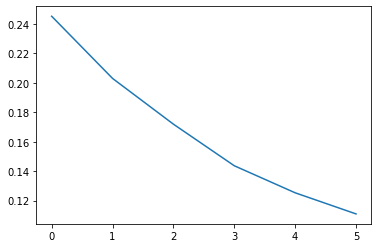

In [596]:
plt.plot(var_explained)

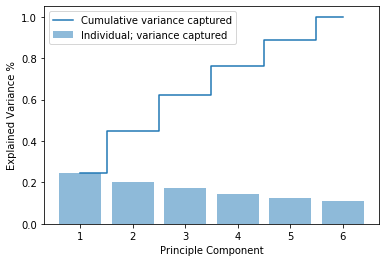

In [597]:
plt.bar(range(1,eigenvalues.size+1), var_explained, alpha =0.5 , align = 'center', label = 'Individual; variance captured')
plt.step(range(1,eigenvalues.size+1), cum_var_exp, where='mid', label = 'Cumulative variance captured')
plt.ylabel('Explained Variance %')
plt.xlabel('Principle Component')
plt.legend(loc = 'best')
plt.show()

# Transforming the data using PCA

In [598]:
# P_reduce represents reduced mathematical space....

P_reduce = np.array(train_eigvectors_sorted[0:5])   # In this case using all the three PC dimensions- not reducing  actually

X_std_3D = np.dot(X_train_std,P_reduce.T)   # projecting original data into principal component dimensions

Proj_train_data_df = pd.DataFrame(X_std_3D)  # converting array to dataframe for pairplot


In [599]:
Proj_train_data_df.head()

,0,1,2,3,4
0,0.937178,0.899909,0.496945,0.223167,1.107076
1,1.235160,-0.217355,-1.061895,-0.967132,0.607638
2,1.523315,0.097843,-0.796741,0.330373,-0.971203
3,-1.040750,-0.104213,0.033675,0.961052,1.050022
4,-0.557566,0.671955,-0.935449,-1.173907,0.314868


In [600]:
Proj_train_data_df.shape

(200, 5)

# Applying KMeans algorithm on the above transformed data.

# # Visualising the clusters first with hierarchical clustering before applying the Kmeans

In [601]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

In [602]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(Proj_train_data_df, 'average')
c, coph_dists = cophenet(Z , pdist(Proj_train_data_df))

c

0.6540403082455538

In [603]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z_completeLinkage = linkage(Proj_train_data_df, 'complete' )
c_completeLinkage, coph_dists = cophenet(Z , pdist(Proj_train_data_df))

c_completeLinkage

0.6540403082455538

In [604]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z_ward = linkage(Proj_train_data_df, 'ward')
c_ward, coph_dists = cophenet(Z , pdist(Proj_train_data_df))

c_ward

0.6540403082455538

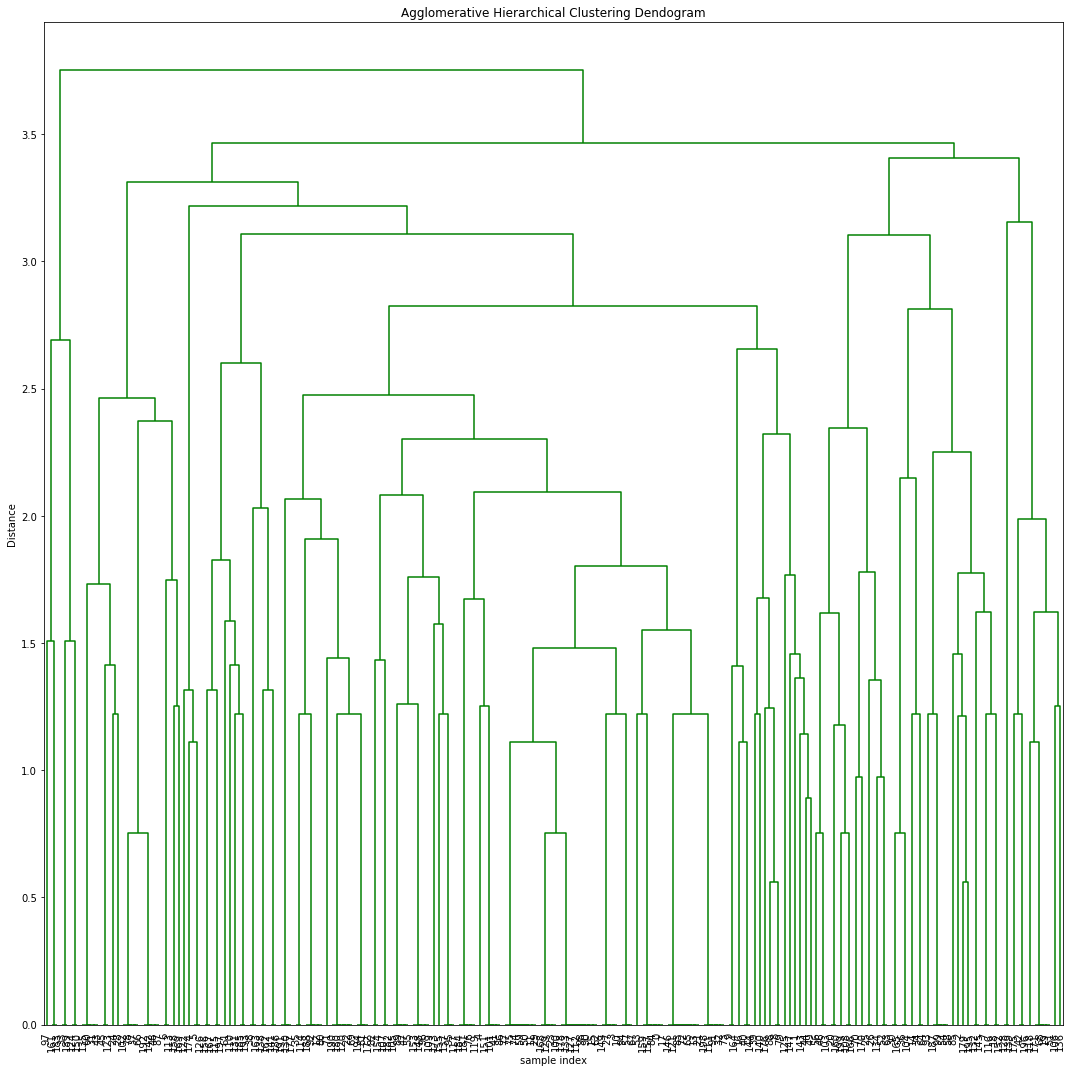

In [605]:
plt.figure(figsize=(15, 15))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 650, leaf_font_size=10. )
plt.tight_layout()

# Applying KMeans algorithm

In [606]:
from sklearn.cluster import KMeans

In [607]:
cluster_range = range( 2, 10)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans(num_clusters)
  clusters.fit(Proj_train_data_df)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,2,831.661330
1,3,712.134851
2,4,625.337735
3,5,559.890686
4,6,515.404518
5,7,477.771253
6,8,432.313637
7,9,406.619530


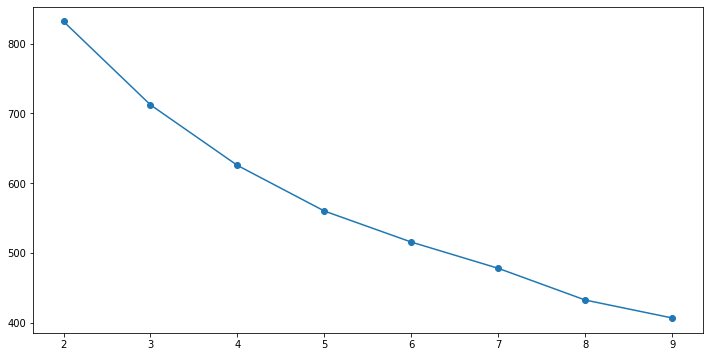

In [608]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

# Selecting optimal number of clusters and form clusters out of the train data

In [609]:
cluster = KMeans( n_clusters = 5, random_state = 1 )
cluster.fit(Proj_train_data_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [610]:
centroids = cluster.cluster_centers_
centroids

array([[ 0.15303177, -1.29594931,  0.46285739, -0.5007425 ,  0.1857016 ],
       [-0.877948  ,  0.49532681,  0.17684404, -1.39028425, -0.47063463],
       [-0.63648953, -0.20497957,  0.18469728,  0.65700035,  0.09523973],
       [ 0.38693059,  1.05898455, -0.06624548,  0.48861064,  1.03798982],
       [ 1.03171642, -0.22170712, -0.73888854,  0.20786155, -1.08714974]])

In [611]:
centroid_df = pd.DataFrame(centroids, columns = list(Proj_train_data_df) )
centroid_df

,0,1,2,3,4
0,0.153032,-1.295949,0.462857,-0.500743,0.185702
1,-0.877948,0.495327,0.176844,-1.390284,-0.470635
2,-0.636490,-0.204980,0.184697,0.657000,0.095240
3,0.386931,1.058985,-0.066245,0.488611,1.037990
4,1.031716,-0.221707,-0.738889,0.207862,-1.087150


# Create a new column in the train data and populate it with the cluster labels

In [612]:
prediction=cluster.predict(Proj_train_data_df)
Proj_train_data_df["GROUP"] = prediction

In [613]:
Proj_train_data_df

,0,1,2,3,4,GROUP
0,0.937178,0.899909,0.496945,0.223167,1.107076,3
1,1.235160,-0.217355,-1.061895,-0.967132,0.607638,4
2,1.523315,0.097843,-0.796741,0.330373,-0.971203,4
3,-1.040750,-0.104213,0.033675,0.961052,1.050022,2
4,-0.557566,0.671955,-0.935449,-1.173907,0.314868,1
...,...,...,...,...,...,...
195,0.775943,-0.016134,-1.512938,-0.368164,-1.367307,4
196,1.626549,-2.542823,0.661975,0.633453,0.392984,0
197,-0.198376,-1.795137,2.010668,-0.922960,-0.102294,0
198,-0.316771,1.358388,-0.409054,0.445330,0.863894,3


In [614]:
# Cound the number of records per group to check the group symmetry 
# Clustering resulting large clusters and small satellite clusters is not good. May need hierarchial clustering in that case

Proj_train_data_df.groupby("GROUP").count()

,0,1,2,3,4
GROUP,,,,,
0,34,34,34,34,34
1,33,33,33,33,33
2,51,51,51,51,51
3,44,44,44,44,44
4,38,38,38,38,38


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B59E2E0C48>,
      dtype=object)

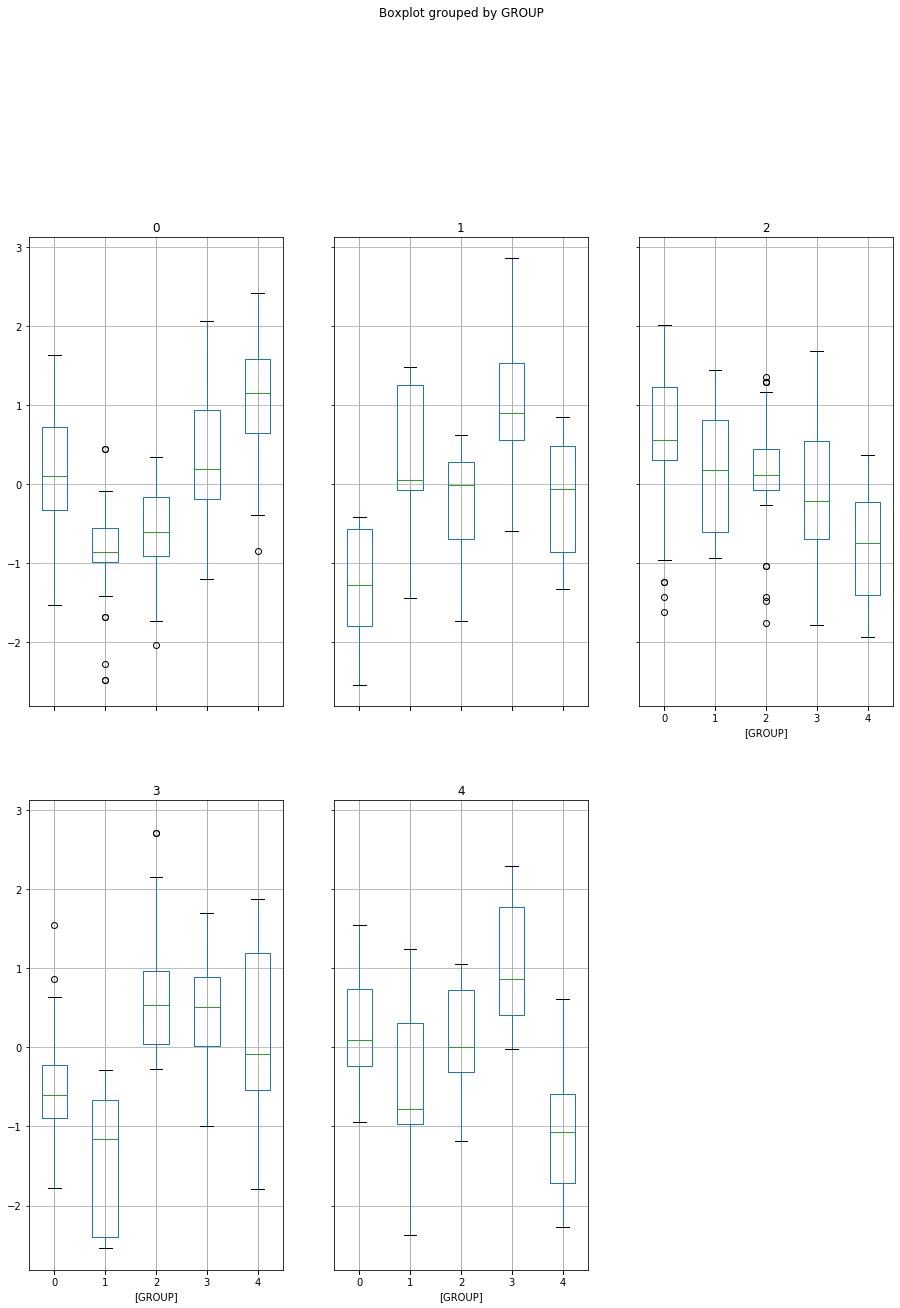

In [615]:
Proj_train_data_df.boxplot(by = 'GROUP',  layout=(4,3), figsize=(15, 40))

# Transforming the test data using the same PCA object that was fit on the train data

In [616]:
#sc = StandardScaler()
#X_test_std =  sc.fit_transform(X_test)
#X_test_std.shape

In [628]:
X_test_std = X_test.apply(zscore)
X_test_std.head()

,Industrial_Risk,Management_Risk,Financial_Flexibility,Credibility,Competitiveness,Operating Risk
67,1.035076,-1.284691,0.201988,-1.295819,1.031938,-0.149071
249,1.035076,0.053529,0.201988,-0.025408,-1.683689,-1.639783
230,-1.489500,1.391748,0.201988,-0.025408,-0.325875,-0.149071
161,-1.489500,0.053529,0.201988,-0.025408,-0.325875,-0.149071
91,1.035076,-1.284691,-1.240786,1.245003,1.031938,1.341641


In [618]:
X_test_dot = np.dot(X_test_std,P_reduce.T)
Proj_test_data = pd.DataFrame(X_test_dot)

In [619]:
Proj_test_data.head()

,0,1,2,3,4
0,0.467410,-1.552949,0.254861,1.491338,0.752523
1,-1.491647,0.582378,1.365769,0.955584,-0.498142
2,-0.492635,0.891020,-0.841050,-1.319850,0.511612
3,0.224670,1.000412,-0.153665,-0.649415,0.891781
4,1.191476,-0.499863,0.001930,0.572790,-1.245135


# Applying kmean and assigning  cluster labels to the test data

In [620]:
prediction_test =cluster.predict(Proj_test_data)
Proj_test_data["GROUP"] = prediction_test

# Applying SVC model on train dataset and predicting target for test dataset

In [621]:
from sklearn.svm import SVC

In [622]:
clf = SVC()
clf.fit(X_train_std, Y_train)

print ('score', clf.score(X_test_std,Y_test))

score 1.0


In [623]:
print ('score', clf.score(X_train_std, Y_train))

score 1.0


In [624]:
clf.fit(Proj_train_data_df, Y_train)
print ('score', clf.score(Proj_test_data,Y_test))

score 1.0


In [625]:
print ('score', clf.score(Proj_train_data_df, Y_train))

score 0.99


In [626]:
y_predict = clf.predict(Proj_test_data)

In [629]:
from sklearn import metrics
print(metrics.confusion_matrix(Y_test, y_predict))

[[21  0]
 [ 0 29]]
